## 1. EDA from Spotify Tracks

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tracks = pd.read_csv('/content/dataset_tracks.csv')

In [ ]:
tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
tracks.drop(columns=['Unnamed: 0',"track_id"], inplace=True)
tracks.dropna(inplace=True)

<ipython-input-41-c95871d236ac>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




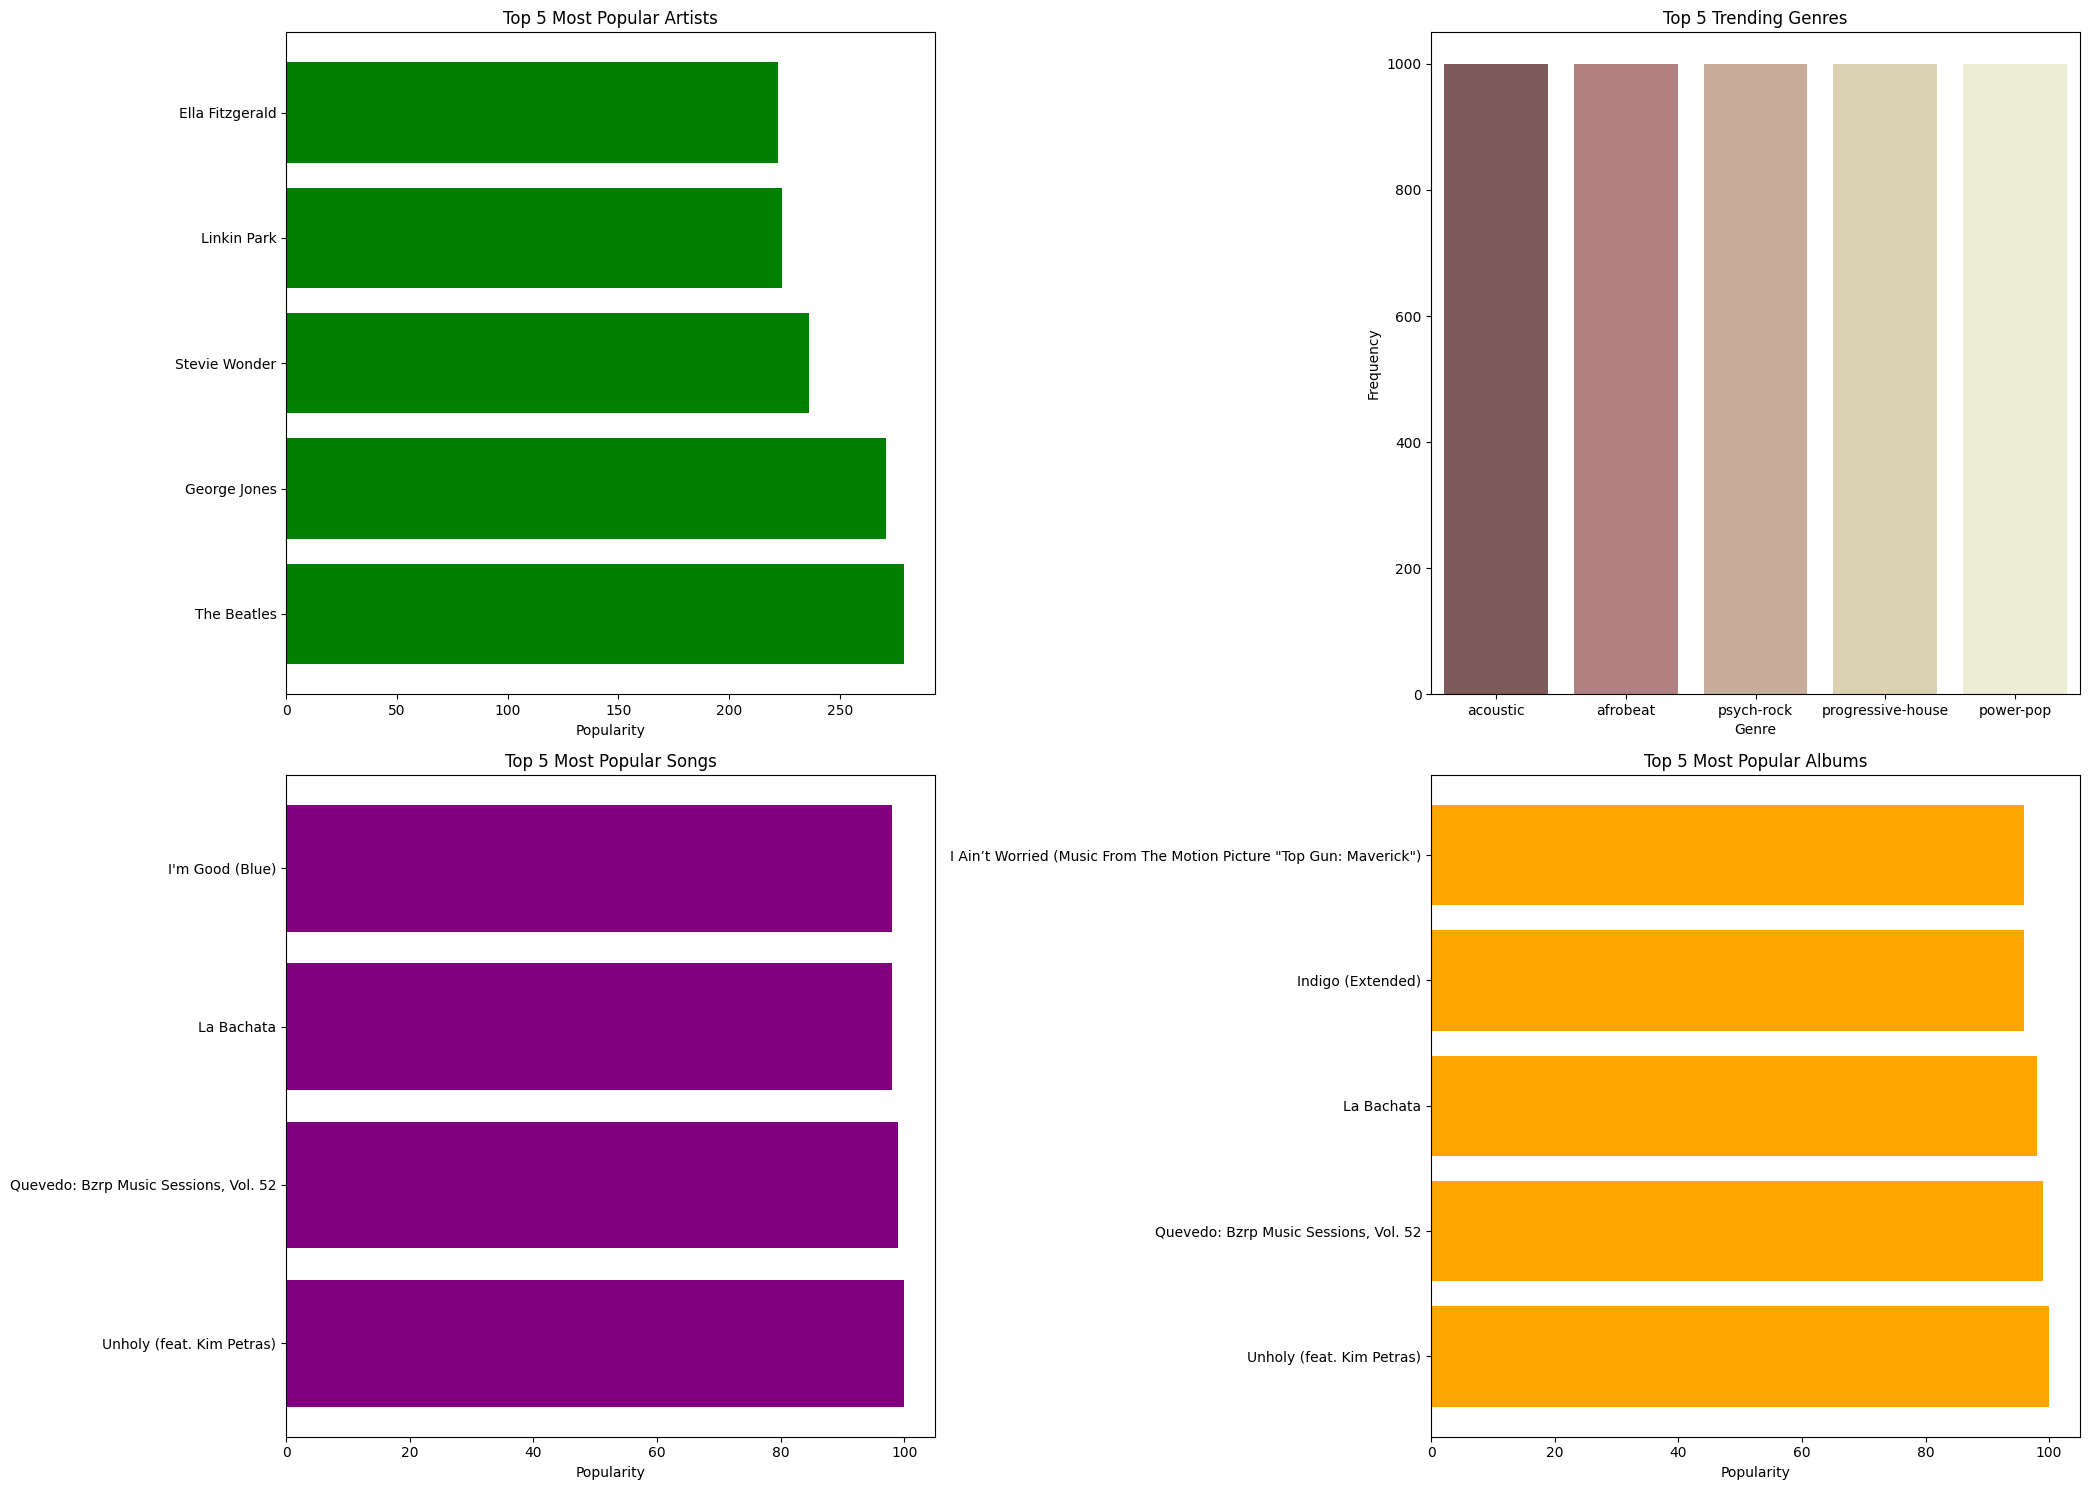

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(21, 15))

# Top 5 Most Popular Artists
popular_artists = tracks.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
axs[0, 0].barh(popular_artists.index, popular_artists.values, color="green")
axs[0, 0].set_title("Top 5 Most Popular Artists")
axs[0, 0].set_xlabel("Popularity")

#Top 5 Most Trending Genres
trend_genre = tracks[['track_genre', 'popularity']].groupby('track_genre').count().sort_values(by='popularity', ascending=False).head(5)
sns.barplot(x=trend_genre.index, y=trend_genre['popularity'], palette='pink', ax=axs[0, 1])
axs[0, 1].set_title("Top 5 Trending Genres")
axs[0, 1].set_xlabel("Genre")
axs[0, 1].set_ylabel("Frequency")

#Top 5 Most Popular Songs
top_songs = tracks[['track_name', 'popularity']].sort_values(by='popularity', ascending=False).head(5)
axs[1, 0].barh(top_songs['track_name'], top_songs['popularity'], color='purple')
axs[1, 0].set_title("Top 5 Most Popular Songs")
axs[1, 0].set_xlabel("Popularity")

#Top 5 Most Popular Albums
top_albums = tracks[['album_name', 'popularity']].groupby('album_name').mean().sort_values(by='popularity', ascending=False).head(5)
axs[1, 1].barh(top_albums.index, top_albums['popularity'], color='orange')
axs[1, 1].set_title("Top 5 Most Popular Albums")
axs[1, 1].set_xlabel("Popularity")

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

In [ ]:
pop_data = tracks[['popularity','duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

##2. Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
  pop_data.drop(['popularity'], axis=1), pop_data["popularity"],
   test_size=0.25,
  random_state=123
)

In [ ]:
predictors_train

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
106954,187159,0.809,0.2690,0,-17.422,1,0.1020,0.659000,0.006490,0.1200,0.4800,127.011,4
464,145514,0.724,0.2800,9,-12.788,1,0.0303,0.755000,0.000000,0.3260,0.5270,106.966,4
14389,131226,0.765,0.3870,7,-6.799,1,0.1470,0.908000,0.000000,0.1850,0.8390,159.966,4
62289,194706,0.598,0.4470,8,-7.932,1,0.0404,0.224000,0.000000,0.0704,0.3650,123.855,4
64081,200461,0.430,0.5430,8,-6.296,1,0.0367,0.463000,0.000523,0.0928,0.3540,143.912,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,90000,0.509,0.9650,11,-3.007,1,0.1290,0.257000,0.000000,0.4000,0.7550,97.006,4
61404,218946,0.638,0.8290,2,-2.629,1,0.0311,0.020400,0.000020,0.0178,0.8960,103.047,4
17730,200125,0.525,0.0265,1,-15.997,0,0.0425,0.849000,0.285000,0.1680,0.0771,120.835,1
28030,241411,0.209,0.6340,9,-7.689,1,0.0538,0.000904,0.000000,0.1310,0.1050,170.213,4


## 3. Finding best model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNearest': KNeighborsClassifier()
}

In [ ]:
mae_results = {}
r2_results = {}
results = {}

In [ ]:
for name, model in models.items():
    cv_scores = cross_val_score(model, predictors_train, target_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    # Training model for predictions
    model.fit(predictors_train, target_train)
    predictions = model.predict(predictors_train)

    # Metrics evaluation
    mae = mean_absolute_error(target_train, predictions)
    r2 = r2_score(target_train, predictions)
    results[name] = rmse_scores
    mae_results[name] = mae
    r2_results[name] = r2

    print(f"{name} - RMSE: {rmse_scores.mean()} -Standart Deviation: {rmse_scores.std()}")
    print(f"{name} - MAE: {mae:.2f} - R²: {r2:.2f}")

Linear Regression - RMSE: 22.066897846340293 -Standart Deviation: 0.11486856244135801
Linear Regression - MAE: 18.42 - R²: 0.02
Ridge - RMSE: 22.066896820919634 -Standart Deviation: 0.11487207565321493
Ridge - MAE: 18.42 - R²: 0.02
Lasso - RMSE: 22.293603510907637 -Standart Deviation: 0.12975088909571642
Lasso - MAE: 18.86 - R²: 0.00
Random Forest - RMSE: 15.911262514047204 -Standart Deviation: 0.08634617253755565
Random Forest - MAE: 4.34 - R²: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Decision Tree - RMSE: 22.100801638882245 -Standart Deviation: 0.11878592419107892
Decision Tree - MAE: 0.49 - R²: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



KNearest - RMSE: 30.166156956097648 -Standart Deviation: 0.13613615601260418
KNearest - MAE: 16.04 - R²: -0.25


## 4. Training best model

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

In [ ]:
model = RandomForestRegressor(random_state=42)

In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=2,
    verbose=2,
    n_jobs=1,
    scoring='neg_mean_squared_error'
)

In [ ]:
grid_search.fit(predictors_train, target_train)

Fitting 2 folds for each of 2970 candidates, totalling 5940 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=111; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=111; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=122; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=133; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators

In [ ]:
#Searching hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

In [ ]:
#Training model with best hyperparameters
best_model = grid_search.best_estimator_

Using KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(predictors_train):
    X_train, X_test = predictors_train.iloc[train_index], predictors_train.iloc[test_index]
    y_train, y_test = target_train.iloc[train_index], target_train.iloc[test_index]

    # Training model
    best_model.fit(X_train, y_train)

    #Predictions
    y_pred = best_model.predict(X_test)

    #MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

#Mean MSE
mean_mse = np.mean(mse_scores)
print(f'Mean MSE: {mean_mse}')


In [ ]:
#Testing the model
target_test_pred = best_model.predict(predictors_test)
target_train_pred = best_model.predict(predictors_train)

In [ ]:
#Calculating errors
rmse_test = np.sqrt(mean_squared_error(target_test, target_test_pred))
rmse_train = np.sqrt(mean_squared_error(target_train, target_train_pred))
print(f'RMSE Test: {round(rmse_test, 4)}')
print(f'RMSE Train: {round(rmse_train, 4)}')

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(target_test, target_test_pred), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

## 5. Evaluating model

In [ ]:
new_data = {
  'duration_ms': 220116,
  'danceability': 0.681,
  'energy':0.788,
  'key': 1,
  'loudness': -4.323,
  'mode': 1,
  'speechiness': 0.0785,
  'acousticness': 0.0482,
   'instrumentalness': 0.0,
  'liveness': 0.0753,
  'valence': 0.839,
  'tempo': 170.019,
  'time_signature': 4
}

In [ ]:
new_data = pd.DataFrame([new_data])

In [ ]:
av_model = best_model.predict(new_data)
print(f'The popularity of this song is near: {av_model}')